# backtesting with grid search using fastquant

## backtest SMAC

`fastquant` offers a convenient way to backtest several trading strategies. To backtest using Simple Moving Average Crossover (`SMAC`), we do the following.

```python
backtest('smac', dcv_data, fast_period=15, slow_period=40)
```

`fast_period` and `slow_period` are two `SMAC` parameters that can be changed depending on the user's preferences. A simple way to fine tune these parameters is to run `backtest` on a grid of values and find which combination of `fast_period` and `slow_period` yields the highest net profit.

First, we fetch `JFC`'s historical data comprised of date, close price, and volume.

In [1]:
from fastquant import get_stock_data, backtest

symbol='JFC'
dcv_data = get_stock_data(symbol, 
                    start_date='2018-01-01', 
                    end_date='2020-04-28',
                    format='dcv',
                    #save=True
                   )
dcv_data.head()

,dt,close,volume
0,2018-01-03,255.4,745780
1,2018-01-04,255.0,617010
2,2018-01-05,255.0,946040
3,2018-01-08,256.0,840630
4,2018-01-09,255.8,978180


Second, we specify the range of reasonable values to explore for `fast_period` and `slow_period`. Let's take between 1 and 20 trading days (roughly a month) in steps of 1 day for `fast_period`, and between 21 and 240 trading days (roughly a year) in steps of 5 days for `slow_period`.

In [2]:
import numpy as np

fast_periods = np.arange(1,20,1)
slow_periods = np.arange(20,241,5)

# make a grid of 0's (placeholder)
period_grid = np.zeros(shape=(len(fast_periods),len(slow_periods)))
period_grid.shape

(19, 45)

Third, we run backtest for each iteration over each pair of `fast_period` and `fast_period`, saving each time the net profit to the `period_grid` variable.

Note: Before running a large grid, try measuring how long it takes your machine to run one backtest instance.
```python
%timeit
backtest(...)
```

In [3]:
init_cash=100000

for i,fast_period in enumerate(fast_periods): 
    for j,slow_period in enumerate(slow_periods):
        cerebro = backtest('smac', 
                           dcv_data, 
                           fast_period=fast_period,
                           slow_period=slow_period,
                           init_cash=100000,
                           verbose=False, 
                           plot=False
                          )
        net_profit = cerebro.broker.getvalue()-init_cash
        period_grid[i,j] = net_profit

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 20
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 25
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 35
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 40
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 45
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 50
===Global level arguments==

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 2
slow_period : 100
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 2
slow_period : 105
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 2
slow_period : 110
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 2
slow_period : 115
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 2
slow_period : 120
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 2
slow_period : 125
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 2
slow_period : 130
===Global level argu

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 3
slow_period : 175
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 3
slow_period : 180
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 3
slow_period : 185
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 3
slow_period : 190
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 3
slow_period : 195
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 3
slow_period : 200
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 3
slow_period : 205
===Global level argu

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 5
slow_period : 20
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 5
slow_period : 25
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 5
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 5
slow_period : 35
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 5
slow_period : 40
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 5
slow_period : 45
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 5
slow_period : 50
===Global level arguments==

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 6
slow_period : 95
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 6
slow_period : 100
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 6
slow_period : 105
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 6
slow_period : 110
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 6
slow_period : 115
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 6
slow_period : 120
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 6
slow_period : 125
===Global level argum

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 170
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 175
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 180
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 185
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 190
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 195
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 200
===Global level argu

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 9
slow_period : 25
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 9
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 9
slow_period : 35
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 9
slow_period : 40
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 9
slow_period : 45
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 9
slow_period : 50
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 9
slow_period : 55
===Global level arguments==

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 10
slow_period : 105
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 10
slow_period : 110
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 10
slow_period : 115
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 10
slow_period : 120
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 10
slow_period : 125
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 10
slow_period : 130
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 10
slow_period : 135
===Global lev

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 11
slow_period : 185
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 11
slow_period : 190
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 11
slow_period : 195
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 11
slow_period : 200
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 11
slow_period : 205
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 11
slow_period : 210
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 11
slow_period : 215
===Global lev

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 13
slow_period : 40
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 13
slow_period : 45
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 13
slow_period : 50
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 13
slow_period : 55
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 13
slow_period : 60
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 13
slow_period : 65
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 13
slow_period : 70
===Global level argu

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 14
slow_period : 115
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 14
slow_period : 120
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 14
slow_period : 125
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 14
slow_period : 130
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 14
slow_period : 135
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 14
slow_period : 140
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 14
slow_period : 145
===Global lev

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 195
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 200
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 205
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 210
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 215
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 220
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 225
===Global lev

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 17
slow_period : 40
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 17
slow_period : 45
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 17
slow_period : 50
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 17
slow_period : 55
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 17
slow_period : 60
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 17
slow_period : 65
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 17
slow_period : 70
===Global level argu

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 18
slow_period : 110
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 18
slow_period : 115
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 18
slow_period : 120
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 18
slow_period : 125
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 18
slow_period : 130
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 18
slow_period : 135
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 18
slow_period : 140
===Global lev

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 19
slow_period : 190
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 19
slow_period : 195
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 19
slow_period : 200
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 19
slow_period : 205
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 19
slow_period : 210
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 19
slow_period : 215
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 19
slow_period : 220
===Global lev

Fourth, we visualize the `period_grid` as a 2D matrix.

In [6]:
best_fast_period, best_slow_period

(30, 105)

<IPython.core.display.Javascript object>


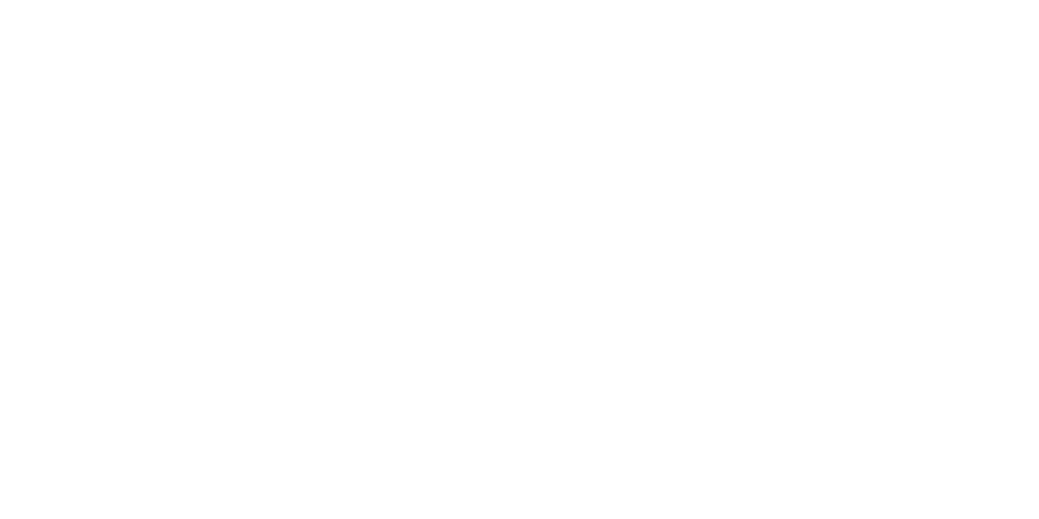

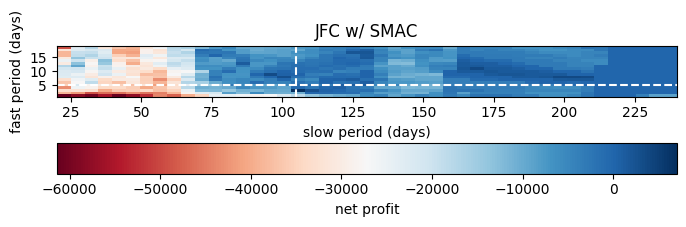

In [14]:
import matplotlib.pyplot as pl
pl.style.use("default")

fig, ax = pl.subplots(1,1, figsize=(8,4))
xmin, xmax = slow_periods[0],slow_periods[-1]
ymin, ymax = fast_periods[0],fast_periods[-1]

#plot matrix
cbar = ax.imshow(period_grid, 
                 origin='lower', 
                 interpolation='none', 
                 extent=[xmin, xmax, ymin, ymax], 
                 cmap=pl.get_cmap('RdBu')
                )
pl.colorbar(cbar, ax=ax, label='net profit', orientation="horizontal")

# search position with highest net profit
y, x = np.unravel_index(np.argmax(period_grid), period_grid.shape)
best_slow_period = slow_periods[x]
best_fast_period = slow_periods[y]
# mark position
ax.annotate(f"max profit={period_grid[y, x]:.0f}@({best_fast_period},{best_slow_period})", (x,y))
ax.axvline(105, 0, 1, c='w', ls='--')
ax.axhline(5, 0, 1, c='w', ls='--')

# add labels
# ax.set_aspect(2)
pl.setp(ax,
        xlim=(xmin,xmax),
        ylim=(ymin,ymax),
        xlabel='slow period (days)',
        ylabel='fast period (days)',
        title='JFC w/ SMAC',
       );

Let's check the results of backtest using best_fast_period and best_slow_period

Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 30
slow_period : 105
2018-09-06, BUY CREATE, 276.00
2018-09-06, Cash: 100000.0
2018-09-06, Price: 276.0
2018-09-06, Buy prop size: 359
2018-09-06, Afforded size: 359
2018-09-06, Final size: 359
2018-09-07, BUY EXECUTED, Price: 276.00, Cost: 99084.00, Comm 743.13
2018-10-08, SELL CREATE, 252.40
2018-10-09, SELL EXECUTED, Price: 252.40, Cost: 99084.00, Comm 679.59
2018-10-09, OPERATION PROFIT, GROSS -8472.40, NET -9895.12
2018-11-20, BUY CREATE, 279.00
2018-11-20, Cash: 90104.883
2018-11-20, Price: 279.0
2018-11-20, Buy prop size: 320
2018-11-20, Afforded size: 320
2018-11-20, Final size: 320
2018-11-21, BUY EXECUTED, Price: 279.00, Cost: 89280.00, Comm 669.60
2019-05-10, SELL CREATE, 302.60
2019-05-14, SELL EXECUTED, Price: 302.60, Cost: 89280.00, Comm 726.24
2019-05-14, OPERATION PROFIT, GROSS 7552.00, NET 6156.16
Final Portfolio Va

<IPython.core.display.Javascript object>


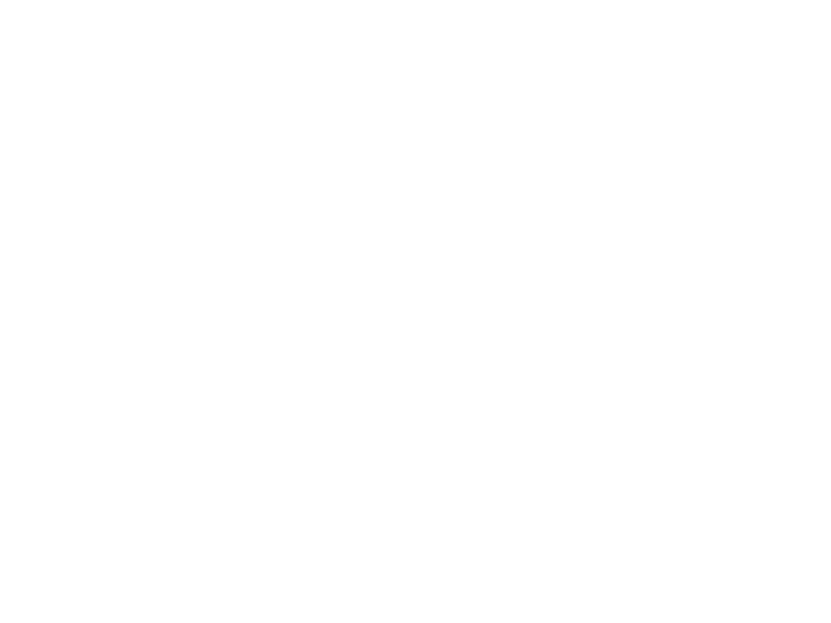

96261.04299999999

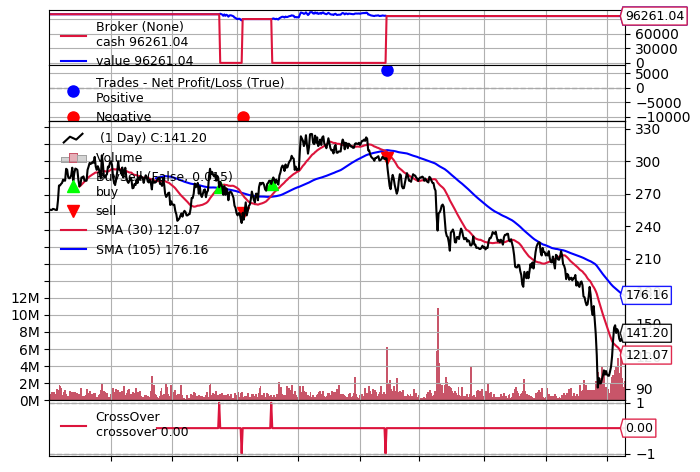

In [15]:
cerebro = backtest('smac', 
                   dcv_data, 
                   fast_period=best_fast_period, 
                   slow_period=best_slow_period, 
                   verbose=True, 
                   plot=True
                  )
cerebro.broker.get_value()